# [Jabama](https://www.jabama.com/) website data analysis

I will analyze data generated from *Jabama.com*. As we can see from scrap notebook, *Data.csv* consists of 27 features. Running *1-Scrap.ipynb* notebook is necessary for this notebook.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

# !pip install Unidecode
from unidecode import unidecode

# !pip install arabic-reshaper
# !pip install python-bidi
from bidi.algorithm import get_display
from arabic_reshaper import reshape

## Why accommodation analysis
There are several main reasons for me to do this research. The most important ones are:
1.   According to the [World Economic Froum report in 2019](https://www.weforum.org/reports/the-travel-tourism-competitiveness-report-2019), Iran was the cheapest country for tourists in 2019 and it has remained one of the cheapest countries in recent years.
2.   Iran is also a safe country to travel, even safer than Russia, Egypt, India, Turkey, Brazil and Thailand. According to [World Economic Froum report in 2019](https://www.weforum.org/reports/the-travel-tourism-competitiveness-report-2019).
3.   As you can see [here](https://www.statista.com/statistics/233223/travel-and-tourism--total-economic-contribution-worldwide), the total share of travel and tourism in GDP worldwide has been steadily increasing from 2006 to 2019. This growth is expected to continue after [Covid 19 pandemic](https://en.wikipedia.org/wiki/COVID-19), in 2021. You can notice the growth of tourism share in Worldwide GPD in the next graph.
4.   Iran is one of the most popular destinations for tourists [in middle east](https://en.wikipedia.org/wiki/World_Tourism_rankings).
5.   Iran has a [diverse climate](https://en.wikipedia.org/wiki/Geography_of_Iran#:~:text=Iran%20has%20a%20variable%20climate,summers%20are%20dry%20and%20hot.&text=In%20general%2C%20Iran%20has%20a,falls%20from%20October%20through%20April), so you can travel around the country to experience a different climate in one day. Therefore, it is difficault to find a good place in different parts of the country.
6.   The number of [domestic and international tourists](https://www.amar.org.ir/%D8%AF%D8%A7%D8%AF%D9%87%D9%87%D8%A7-%D9%88-%D8%A7%D8%B7%D9%84%D8%A7%D8%B9%D8%A7%D8%AA-%D8%A2%D9%85%D8%A7%D8%B1%DB%8C/%D9%81%D8%B1%D9%87%D9%86%DA%AF-%D9%88%D8%B1%D8%B2%D8%B4-%D9%88-%DA%AF%D8%B1%D8%AF%D8%B4%DA%AF%D8%B1%DB%8C/%DA%AF%D8%B1%D8%AF%D8%B4%DA%AF%D8%B1%DB%8C#5686894--) was growing during the recent years in Iran.

The above reasons make it very difficult to find a suitable place to spend a night as a tourist. Therefore, studying and comparing data in different cities and provinces in the field of residence in Iran seems necessary.


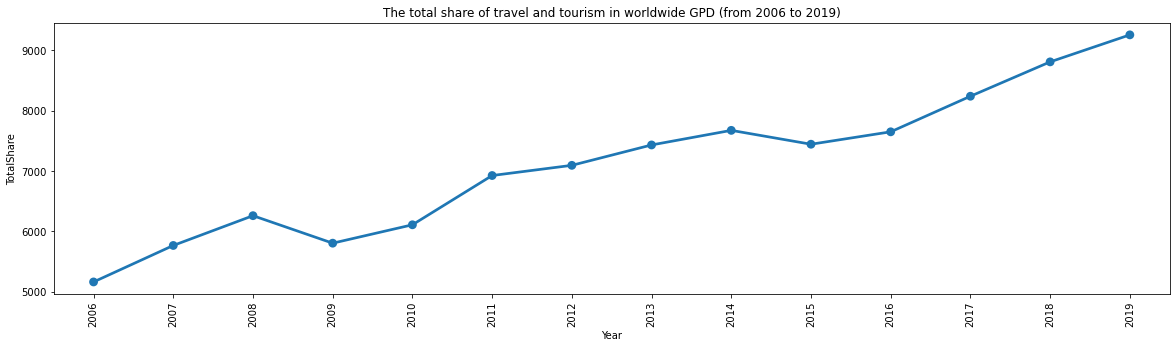

In [2]:
df_Gpd= pd.read_csv('TourismShareInGPD.csv', encoding="utf-8")  

plt.figure(figsize= (20, 5))
sns.pointplot(data=df_Gpd, x="Year", y="TotalShare")
plt.ylabel(get_display(reshape('TotalShare')))
plt.xlabel(get_display(reshape('Year')))
plt.title('The total share of travel and tourism in worldwide GPD (from 2006 to 2019)')
plt.xticks(rotation = "vertical")
plt.show()

## Load data
The input data is in *Data.csv*. I load it with *utf-8* encoding. Due to the way I searched the site for accommodations, many duplicated rows of data is generated, so I remove duplicates right after loading data. We can see the shape and sample rows of dataframe.

In [3]:
df = pd.read_csv('Data.csv', encoding="utf-8")  
df.drop_duplicates(subset =None, keep = 'first', inplace = True)
# df.reset_index()
df.shape

(4374, 27)

In [4]:
df.head()

,code,kind,price,comment,score,city,foundation,area,room,capacity,...,refrigerator,closet,cooking,oven,furniture,dining_table,restaurant,green_space,lobby,elavator
0,85754,inn,۱۶۰۰۰۰,۲۷,۴.۷,اردبیل- اردبیل,۰ متر زیربنا,۰ متر کل بنا,۰ اتاق,ظرفیت ۲ نفر,...,False,False,False,False,False,False,False,False,False,False
1,85779,inn,۲۰۰۰۰۰,۲۲,۴.۸,اردبیل- اردبیل,۰ متر زیربنا,۰ متر کل بنا,۰ اتاق,ظرفیت ۳ نفر,...,False,False,False,False,False,False,False,False,False,False
2,85775,inn,۲۵۰۰۰۰,۲۱,۴.۸,اردبیل- اردبیل,۰ متر زیربنا,۰ متر کل بنا,۰ اتاق,ظرفیت ۴ نفر,...,False,False,False,False,False,False,False,False,False,False
3,331103,ecotourism,۱۱۰۰۰۰,جدید,NaN,اردبیل- نمین,۱۲۰ متر زیربنا,۱۰۰۰ متر کل بنا,۰ اتاق,ظرفیت ۸ نفر,...,False,False,False,False,False,False,False,False,False,False
4,331102,ecotourism,۲۴۰۰۰۰,جدید,NaN,اردبیل- نمین,۱۲۰ متر زیربنا,۱۰۰۰ متر کل بنا,۱ اتاق,ظرفیت ۲ نفر,...,False,False,False,False,False,False,False,False,False,False


## Cleaning data
Because of the our data structures and *Farsi* characters, I have alot to do for cleaning data. The numeric data is located inside of a string phrase. For example the capacity number of accommodation is loctated inside of such a phrase : *ظرفیت تا ۱۰ نفر (۳ نفر پایه + تا ۷ نفر اضافه)*. 

I need to extract the numeric data from text and decode it, to obtain a usable data. Many features have this situation, some of them only need decoding, some of them need decoding and extraction. Therefore preparing data is a hard and time consuming process in this notebook. In addition to extraction and decoding, I set the type of all features so that I do not have any feature with object data type.

For this purpose, I will add some *temp* columns to dataframe for data separation. When this process ends, I remove those temparory columns.

I decide to add 3 new features to dataframe. The *capacity* feature contains 3 (*capacity*, *capacity_base* and *capacity_added*) features. The *city* feature also contains 2 (*city* and *province*) features. Lastly, our dataframe will consists of 30 features.

In [5]:
# int columns
df['price'] = pd.to_numeric(df.price.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

df['comment'] = pd.to_numeric(df.comment.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

# float column
df[['score','temp']] = df['score'].str.split('.',expand=True)
df['score'] = df['score'].replace(np.nan, '۰')
df['temp'] = df['temp'].replace(np.nan, '۰').astype(float)
df['score'] = pd.to_numeric(df.score.apply(unidecode), errors='coerce').astype(float)
df['score'] = df['score'] + (df['temp'] * 0.1)

# string columns
df['kind'] = df['kind'].astype(pd.StringDtype())

df[['room','temp1']] = df['room'].str.split('اتاق',expand=True)
df['room'] = pd.to_numeric(df.room.apply(unidecode), errors='coerce').astype(int)

df[['foundation','temp1']] = df['foundation'].str.split('متر زیربنا',expand=True)
df['foundation'] = pd.to_numeric(df.foundation.apply(unidecode), errors='coerce').astype(int)

df[['area','temp1']] = df['area'].str.split('متر کل بنا',expand=True)
df['area'] = pd.to_numeric(df.area.apply(unidecode), errors='coerce').astype(int)

df['double_bed'] = df['double_bed'].replace({'ندارد': '۰'}, regex=True)
df[['double_bed','temp1']] = df['double_bed'].str.split('تخت دو نفره',expand=True)
df['double_bed'] = pd.to_numeric(df.double_bed.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

df['single_bed'] = df['single_bed'].replace({'ندارد': '۰'}, regex=True)
df[['single_bed','temp1']] = df['single_bed'].str.split('تخت یک نفره',expand=True)
df['single_bed'] = pd.to_numeric(df.single_bed.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

df['iranian_bed'] = df['iranian_bed'].replace({'ندارد': '۰'}, regex=True)
df[['iranian_bed','temp1']] = df['iranian_bed'].str.split('رخت‌خواب سنتی',expand=True)
df['iranian_bed'] = pd.to_numeric(df.iranian_bed.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

df['toilet'] = df['toilet'].replace({'ندارد': '۰'}, regex=True)
df[['toilet','temp1']] = df['toilet'].str.split('سرویس بهداشتی',expand=True)
df['toilet'] = pd.to_numeric(df.toilet.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

df['bath'] = df['bath'].replace({'ندارد': '۰'}, regex=True)
df[['bath','temp1']] = df['bath'].str.split('حمام',expand=True)
df['bath'] = pd.to_numeric(df.bath.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

repl_dict ={ 
    'ظرفیت':'',
    'تا':'',
    'نفر':'',
    'پایه':'',
    'اضافه':''
}
df['capacity'] = df['capacity'].replace(repl_dict, regex=True)
df[['capacity','temp1']] = df['capacity'].str.split('(',expand=True)
df['temp1'] = df['temp1'].replace({'\)': ''}, regex=True)
df[['temp1','capacity_base']] = df['temp1'].str.split('+',expand=True)
df['capacity'] = pd.to_numeric(df.capacity.apply(unidecode), errors='coerce').astype(int)
df['capacity_base'] = df['capacity_base'].fillna('۰')
df['capacity_base'] = pd.to_numeric(df.capacity_base.apply(unidecode), errors='coerce').astype(int)
df['capacity_added'] = df['temp1'].fillna('۰')
df['capacity_added'] = pd.to_numeric(df.capacity_added.apply(unidecode), errors='coerce').astype(int)

df[['temp1','city']] = df['city'].str.split('-',expand=True).astype(pd.StringDtype())
df['city'] = df['temp1'].astype(pd.StringDtype())
df['province'] = df['temp1'].fillna('').astype(pd.StringDtype())
df['province'] = df['province'].str.strip()


As I said before, remove temparory columns and reorder the dataframe columns.

In [6]:
df.drop('temp', inplace=True, axis=1)
df.drop('temp1', inplace=True, axis=1)
df = df[['code','kind','price','comment','score','province','city','foundation','area','room','capacity_base','capacity_added'
         ,'capacity','double_bed','single_bed','iranian_bed','toilet','bath','water','water_cooler','refrigerator','closet'
         ,'cooking','oven','furniture','dining_table','restaurant','green_space','lobby','elavator']]

You can notice that data is extracted correctly and all 30 columns have correct, unique, non-null and decoded data. The head of data and column information are shown bellow.

In [7]:
df.head()

,code,kind,price,comment,score,province,city,foundation,area,room,...,refrigerator,closet,cooking,oven,furniture,dining_table,restaurant,green_space,lobby,elavator
0,85754,inn,160000,27,4.7,اردبیل,اردبیل,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,85779,inn,200000,22,4.8,اردبیل,اردبیل,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,85775,inn,250000,21,4.8,اردبیل,اردبیل,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,331103,ecotourism,110000,0,0.0,اردبیل,اردبیل,120,1000,0,...,False,False,False,False,False,False,False,False,False,False
4,331102,ecotourism,240000,0,0.0,اردبیل,اردبیل,120,1000,1,...,False,False,False,False,False,False,False,False,False,False


The final dataset will have 4374 rows and 27 columns. We have no null value and 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4374 entries, 0 to 5202
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   code            4374 non-null   int64  
 1   kind            4374 non-null   string 
 2   price           4374 non-null   int32  
 3   comment         4374 non-null   int32  
 4   score           4374 non-null   float64
 5   province        4374 non-null   string 
 6   city            4374 non-null   string 
 7   foundation      4374 non-null   int32  
 8   area            4374 non-null   int32  
 9   room            4374 non-null   int32  
 10  capacity_base   4374 non-null   int32  
 11  capacity_added  4374 non-null   int32  
 12  capacity        4374 non-null   int32  
 13  double_bed      4374 non-null   int32  
 14  single_bed      4374 non-null   int32  
 15  iranian_bed     4374 non-null   int32  
 16  toilet          4374 non-null   int32  
 17  bath            4374 non-null   i

In [9]:
df.groupby('province')[['price' , 'comment', 'score']].agg([np.min ,np.max, np.mean, np.var, 'count'])

price                                             comment  \
                  amin      amax          mean           var count    amin   
province                                                                     
آذربایجان شرقی   35000   1000000  4.270000e+05  1.311450e+11     5       0   
آذربایجان غربی  400000    400000  4.000000e+05           NaN     1       1   
اردبیل          110000    600000  2.556522e+05  1.129615e+10    23       0   
اصفهان           70000   1600000  5.263543e+05  1.343344e+11   223       0   
البرز                0  14000000  1.729262e+06  1.638600e+12   200       0   
ایلام           500000   1100000  8.000000e+05  1.800000e+11     2       0   
بوشهر           230000   1400000  4.789091e+05  7.710237e+10    22       0   
تهران                0  18000000  1.044742e+06  1.556163e+12   458       0   
خراسان جنوبی    220000    330000  2.970000e+05  2.420000e+09     5       1   
خراسان رضوی      20000   5000000  5.487732e+05  6.852002e+11   269       0   
خراسان شمالی     55000    250000  9.527027e+04  2.674925e+09    37       0   
زنجان           110000    846000  4.620909e+05  4.513247e+10    22       0   
سمنان            80000    680000  1.602889e+05  1.637751e+10    90       0   
فارس              1000   3200000  4.787294e+05  3.177987e+11   170       0   
قزوین           120000    600000  3.393333e+05  1.920667e+10    15       0   
قم               65000    448000  1.603846e+05  7.228726e+09    26       0   
مازندران          3000   6500000  9.547535e+05  8.225377e+11   852       0   
مرکزی            70000    420000  2.000000e+05  2.793333e+10     4       0   
هرمزگان           1000  10000000  6.356337e+05  5.278242e+11   475       0   
همدان            85000    930000  2.418205e+05  4.132799e+10    39       0   
کردستان          70000    700000  1.347188e+05  1.711576e+10    32       0   
کرمان           100000    440000  2.363158e+05  1.815789e+10    19       0   
کرمانشاه         70000    800000  2.732143e+05  3.244854e+10    28       0   
گلستان           50000   4500000  3.376753e+05  1.237081e+11   231       0   
گیلان             1000   5750000  5.396493e+05  4.011318e+11   881       0   
یزد              75000    960000  3.063592e+05  3.443843e+10   245       0   

                                                score                 \
               amax      mean         var count  amin amax      mean   
province                                                               
آذربایجان شرقی   10  2.000000   20.000000     5   0.0  4.2  0.840000   
آذربایجان غربی    1  1.000000         NaN     1   4.0  4.0  4.000000   
اردبیل           27  5.695652   60.130435    23   0.0  5.0  2.347826   
اصفهان           37  3.941704   54.802893   223   0.0  5.0  2.378924   
البرز            51  8.035000   57.993744   200   0.0  5.0  3.167000   
ایلام             0  0.000000    0.000000     2   0.0  0.0  0.000000   
بوشهر             1  0.090909    0.086580    22   0.0  5.0  0.454545   
تهران            86  8.855895  107.637832   458   0.0  5.0  3.477074   
خراسان جنوبی      1  1.000000    0.000000     5   1.0  1.0  1.000000   
خراسان رضوی      55  7.356877   66.125895   269   0.0  5.0  3.863197   
خراسان شمالی      1  0.027027    0.027027    37   0.0  5.0  0.135135   
زنجان            10  4.090909   20.753247    22   0.0  4.8  1.995455   
سمنان            14  0.755556    5.287890    90   0.0  5.0  1.093333   
فارس             24  3.588235   30.705186   170   0.0  5.0  1.912941   
قزوین             7  1.933333    7.495238    15   0.0  4.2  2.033333   
قم               32  7.076923   73.913846    26   0.0  4.5  3.246154   
مازندران         48  3.129108   27.764745   852   0.0  5.0  1.970070   
مرکزی             1  0.250000    0.250000     4   0.0  3.0  0.750000   
هرمزگان          39  1.088421   11.194697   475   0.0  5.0  1.010105   
همدان            17  2.564103   24.831309    39   0.0  5.0  1.541026   
کردستان           0  0.000000    0.000000    32   0.0  0.0  0.000000   
کرمان             2  0.736

In [10]:
df.groupby('kind')[['price' , 'comment', 'score']].agg([np.min ,np.max, np.mean, np.var, 'count'])

price                                             comment       \
               amin      amax          mean           var count    amin amax   
kind                                                                           
apartment         0  18000000  7.950618e+05  8.030035e+11   842       0   34   
carvansara   520000    840000  6.883333e+05  2.580833e+10     3       0    1   
complex        1000   3100000  5.097004e+05  1.782784e+11   227       0   55   
cottage      115000   2760000  6.087845e+05  1.768959e+11   232       0   37   
ecotourism    20000   3000000  2.882281e+05  5.789784e+10  1017       0   20   
hostel        70000    800000  2.288158e+05  1.947653e+10    38       0   34   
inn           79000   2850000  2.772411e+05  4.926677e+10   224       0   86   
suite         40000   4100000  4.342937e+05  7.852985e+10   647       0   56   
traditional    1000   1650000  4.955579e+05  1.091063e+11   337       0   22   
villa             0  14000000  1.561742e+06  1.690973e+12   807       0   51   

                                         score                                 
                  mean         var count  amin amax      mean       var count  
kind                                                                           
apartment     3.408551   22.168203   842   0.0  5.0  2.074941  3.981119   842  
carvansara    0.333333    0.333333     3   0.0  4.0  1.333333  5.333333     3  
complex       6.017621   94.566060   227   0.0  5.0  2.466520  3.898520   227  
cottage       3.280172   31.743674   232   0.0  5.0  2.228448  4.544209   232  
ecotourism    1.145526    7.069353  1017   0.0  5.0  1.103245  3.429113  1017  
hostel        5.815789  115.613798    38   0.0  5.0  2.705263  5.048620    38  
inn          11.883929  202.973014   224   0.0  4.8  3.500446  1.754036   224  
suite         2.825348   22.605672   647   0.0  5.0  1.900155  4.249861   647  
traditional   2.317507   19.800675   337   0.0  5.0  1.696439  4.635940   337  
villa         4.511772   39.456127   807   0.0  5.0  2.391945  4.125754   807

In [11]:
fig , axes = plt.subplots(1,2,figsize = (17, 10))

x_labels = df['kind'].value_counts(sort = True , normalize = True).index.tolist()
y_labels = df['kind'].value_counts(sort = True , normalize = True).tolist()
y_labels = [element * 100 for element in y_labels]
persian_labels = [get_display(reshape(label)) for label in x_labels]
data = {'kind':persian_labels, 'percentage':y_labels, 'kind_name':x_labels}
df_temp_kind = pd.DataFrame(data)
g1 = sns.barplot(y="kind", x="percentage", data=df_temp_kind, ax=axes[0])
g1.set(title=get_display(reshape('درصد انواع اقامتگاه ها')))
g1.set(xlabel=None)
g1.set(ylabel=None)


x_labels = df['province'].value_counts(sort = True , normalize = True).index.tolist()
y_labels = df['province'].value_counts(sort = True , normalize = True).tolist()\
y_labels = [element * 100 for element in y_labels]
persian_labels = [get_display(reshape(label)) for label in x_labels]
data = {'province':persian_labels, 'percentage':y_labels, 'province_name':x_labels}
df_temp_province = pd.DataFrame(data)
g2 = sns.barplot(y="province", x="percentage", data=df_temp_province, ax=axes[1])
g2.set(title=get_display(reshape('درصد سهم استانها از اقامتگاه ')))
g2.set(xlabel=None)
g2.set(ylabel=None)

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (<ipython-input-11-06dc4f61a358>, line 17)

In [11]:
display(df_temp_province[['province_name','percentage']].head(6))
display(df_temp_kind[['kind_name','percentage']].head(6))

,province_name,percentage
0,مازندران,0.271960
1,هرمزگان,0.175681
2,گیلان,0.138473
3,اصفهان,0.102033
4,یزد,0.072881
5,تهران,0.064442


,kind_name,percentage
0,villa,20.099731
1,ecotourism,18.373610
2,apartment,17.337936
3,suite,11.123897
4,traditional,8.937476
5,inn,8.860759


In [12]:
# plt.figure(figsize= (10, 7))
# sns.kdeplot(x = "price", hue = "province", fill= True,data = df_temp_province[df_temp_province['kind'] == 'villa']
#             , palette= "tab10")
# plt.title("Distribution of Attack", fontsize = 15)
# plt.ylabel("Frequency")
# plt.show()